In [1]:
import pandas as pd # DataFrame 을 위한 모듈
import numpy as np # arrange 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
ta = pd.read_csv("테크온_전처리.csv", encoding="cp949")
ta

,제품군,특징,용도,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
0,LUCON PS6072,전기전도성,"ATM 부품, ESS, LCD Cell tray, Vacuum Cleaner, Ai...",ABS,1.06,45.00,NaN,7.0,75.00,2500.0,NaN
1,LUPOY GP1004MU,난연,"자동차 내장재, 휴대폰, TV, 노트북 등",ABS,1.20,58.80,NaN,100.0,88.20,2156.0,NaN
2,LUPOY GP5008A,"일반, 비보강","자동차 내/외장재, 휴대폰, TV, 노트북 등",ABS,1.10,39.20,NaN,NaN,59.78,1666.0,NaN
3,LUPOY HI5002A,"일반, 비보강","자동차 내/외장재, 휴대폰, TV, 노트북 등",ABS,1.11,54.88,NaN,70.0,84.28,2058.0,NaN
4,LUPOY HR5006A,"내충격, 고내열, 비보강","자동차 내/외장재, 휴대폰, TV, 노트북 등",ABS,1.13,52.92,NaN,110.0,83.30,2205.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
657,AE-3063I,일반,자동차,PC,1.20,50.00,48.0,120.0,67.00,1800.0,1600.0
658,AE-2030,일반,Automotive,PC,1.20,54.00,52.0,100.0,80.00,2200.0,2100.0
659,AE-2130,일반,Automotive,PC,1.23,56.00,55.0,90.0,82.00,2400.0,2400.0
660,AE-2150,일반,Automotive,PC,1.33,63.00,58.0,4.0,100.00,4000.0,3800.0


In [3]:
df_0 = ta.iloc[:,3:10]  # 기존 ta데이터에서 학습시키기위해 세부와 각 수치만을 뽑음
df_0

,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률
0,ABS,1.06,45.00,NaN,7.0,75.00,2500.0
1,ABS,1.20,58.80,NaN,100.0,88.20,2156.0
2,ABS,1.10,39.20,NaN,NaN,59.78,1666.0
3,ABS,1.11,54.88,NaN,70.0,84.28,2058.0
4,ABS,1.13,52.92,NaN,110.0,83.30,2205.0
...,...,...,...,...,...,...,...
657,PC,1.20,50.00,48.0,120.0,67.00,1800.0
658,PC,1.20,54.00,52.0,100.0,80.00,2200.0
659,PC,1.23,56.00,55.0,90.0,82.00,2400.0
660,PC,1.33,63.00,58.0,4.0,100.00,4000.0


### 학습시키기 위해 결측값 0으로 채우기
### X,y로 나눠 진행

In [4]:
df_0 = df_0.fillna(0) 

In [5]:
X = df_0.iloc[:,1:7]
X

,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률
0,1.06,45.00,0.0,7.0,75.00,2500.0
1,1.20,58.80,0.0,100.0,88.20,2156.0
2,1.10,39.20,0.0,0.0,59.78,1666.0
3,1.11,54.88,0.0,70.0,84.28,2058.0
4,1.13,52.92,0.0,110.0,83.30,2205.0
...,...,...,...,...,...,...
657,1.20,50.00,48.0,120.0,67.00,1800.0
658,1.20,54.00,52.0,100.0,80.00,2200.0
659,1.23,56.00,55.0,90.0,82.00,2400.0
660,1.33,63.00,58.0,4.0,100.00,4000.0


In [6]:
y = df_0["수지종류"]
y

0      ABS
1      ABS
2      ABS
3      ABS
4      ABS
      ... 
657     PC
658     PC
659     PC
660     PC
661     PC
Name: 수지종류, Length: 662, dtype: object

### 학습시킬 데이터 x,y 나누기

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

## KNeighborsClassifier 머신러닝

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.5180722891566265

### 최근값을 5로 잡았을 때 가장 높은 score값 
### 과적합이 될 수 있음

## LogisticRegression 머신러닝

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5180722891566265

## MLPClassifier 머신러닝 

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.46987951807228917

## DecisionTreeClassifier 머신러닝

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.4819277108433735

# 결론 : 결측치를 0으로 대체했을 때 학습능력이 많이 떨어진다.
# 따라서 다른 값으로 대체해야할 필요성을 느낌

# ---------------------------------

## 결측치를 평균 값으로 대체해서 학습

In [14]:
df = ta.iloc[:,3:11]  # 기존 ta데이터에서 학습시키기위해 세부와 각 수치만을 뽑음
df

,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
0,ABS,1.06,45.00,NaN,7.0,75.00,2500.0,NaN
1,ABS,1.20,58.80,NaN,100.0,88.20,2156.0,NaN
2,ABS,1.10,39.20,NaN,NaN,59.78,1666.0,NaN
3,ABS,1.11,54.88,NaN,70.0,84.28,2058.0,NaN
4,ABS,1.13,52.92,NaN,110.0,83.30,2205.0,NaN
...,...,...,...,...,...,...,...,...
657,PC,1.20,50.00,48.0,120.0,67.00,1800.0,1600.0
658,PC,1.20,54.00,52.0,100.0,80.00,2200.0,2100.0
659,PC,1.23,56.00,55.0,90.0,82.00,2400.0,2400.0
660,PC,1.33,63.00,58.0,4.0,100.00,4000.0,3800.0


In [15]:
temp1 = df['비중(Specific Gravity)'].sum()/662
temp2 = df['인장강도'].sum()/662
temp3 = df['파단강도'].sum()/662
temp4 = df['굴곡강도'].sum()/662
temp5 = df['굴곡 탄성률'].sum()/662
temp6 = df['인장탄성율(Mpa)'].sum()/662
temp7 = df['신율\n(%)'].sum()/662

In [16]:
df['비중(Specific Gravity)'] = df['비중(Specific Gravity)'].fillna(temp1)
df['인장강도'] = df['인장강도'].fillna(temp2)
df['파단강도'] = df['파단강도'].fillna(temp3)
df['굴곡강도'] = df['굴곡강도'].fillna(temp4)
df['굴곡 탄성률'] = df['굴곡 탄성률'].fillna(temp5)
df['인장탄성율(Mpa)'] = df['인장탄성율(Mpa)'].fillna(temp6)
df['신율\n(%)'] = df['신율\n(%)'].fillna(temp7)

In [17]:
X = df.iloc[:,1:8]
y = df['수지종류']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5783132530120482

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.4397590361445783

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.4879518072289157

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.39759036144578314

# 결론 : 결측치를 평균값으로 대체를 해도 여전히 떨어지는 학습능력

In [23]:
df = ta.iloc[:,3:11]  # 기존 ta데이터에서 학습시키기위해 세부와 각 수치만을 뽑음
df

,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
0,ABS,1.06,45.00,NaN,7.0,75.00,2500.0,NaN
1,ABS,1.20,58.80,NaN,100.0,88.20,2156.0,NaN
2,ABS,1.10,39.20,NaN,NaN,59.78,1666.0,NaN
3,ABS,1.11,54.88,NaN,70.0,84.28,2058.0,NaN
4,ABS,1.13,52.92,NaN,110.0,83.30,2205.0,NaN
...,...,...,...,...,...,...,...,...
657,PC,1.20,50.00,48.0,120.0,67.00,1800.0,1600.0
658,PC,1.20,54.00,52.0,100.0,80.00,2200.0,2100.0
659,PC,1.23,56.00,55.0,90.0,82.00,2400.0,2400.0
660,PC,1.33,63.00,58.0,4.0,100.00,4000.0,3800.0


In [24]:
df_abs = df[df["수지종류"] == "ABS"]
df_pa = df[df["수지종류"] == "PA"]
df_pbt = df[df["수지종류"] == "PBT"]
df_pc = df[df["수지종류"] == "PC"]
df_pe = df[df["수지종류"] == "PE"]
df_pom = df[df["수지종류"] == "POM"]
df_pp = df[df["수지종류"] == "PP"]
df_ppa = df[df["수지종류"] == "PPA"]
df_pps = df[df["수지종류"] == "PPS"]
df_tpc = df[df["수지종류"] == "TPC"]

In [25]:
temp_1 = df_abs['비중(Specific Gravity)'].sum()/len(df_abs)
temp_2 = df_abs['인장강도'].sum()/len(df_abs)
temp_3 = df_abs['파단강도'].sum()/len(df_abs)
temp_4 = df_abs['신율\n(%)'].sum()/len(df_abs)
temp_5 = df_abs['굴곡강도'].sum()/len(df_abs)
temp_6 = df_abs['굴곡 탄성률'].sum()/len(df_abs)
temp_7 = df_abs['인장탄성율(Mpa)'].sum()/len(df_abs)

In [26]:
df_abs['비중(Specific Gravity)'] = df_abs['비중(Specific Gravity)'].fillna(temp_1)
df_abs['인장강도'] = df_abs['인장강도'].fillna(temp_2)
df_abs['파단강도'] = df_abs['파단강도'].fillna(temp_3)
df_abs['신율\n(%)'] = df_abs['신율\n(%)'].fillna(temp_4)
df_abs['굴곡강도'] = df_abs['굴곡강도'].fillna(temp_5)
df_abs['굴곡 탄성률'] = df_abs['굴곡 탄성률'].fillna(temp_6)
df_abs['인장탄성율(Mpa)'] = df_abs['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-26-358bebe324ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['비중(Specific Gravity)'] = df_abs['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-26-358bebe324ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['인장강도'] = df_abs['인장강도'].fillna(temp_2)
<ipython-input-26-358bebe324ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [27]:
temp_1 = df_pc['비중(Specific Gravity)'].sum()/len(df_pc)
temp_2 = df_pc['인장강도'].sum()/len(df_pc)
temp_3 = df_pc['파단강도'].sum()/len(df_pc)
temp_4 = df_pc['신율\n(%)'].sum()/len(df_pc)
temp_5 = df_pc['굴곡강도'].sum()/len(df_pc)
temp_6 = df_pc['굴곡 탄성률'].sum()/len(df_pc)
temp_7 = df_pc['인장탄성율(Mpa)'].sum()/len(df_pc)

In [28]:
df_pc['비중(Specific Gravity)'] = df_pc['비중(Specific Gravity)'].fillna(temp_1)
df_pc['인장강도'] = df_pc['인장강도'].fillna(temp_2)
df_pc['파단강도'] = df_pc['파단강도'].fillna(temp_3)
df_pc['신율\n(%)'] = df_pc['신율\n(%)'].fillna(temp_4)
df_pc['굴곡강도'] = df_pc['굴곡강도'].fillna(temp_5)
df_pc['굴곡 탄성률'] = df_pc['굴곡 탄성률'].fillna(temp_6)
df_pc['인장탄성율(Mpa)'] = df_pc['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-28-7210230559e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['비중(Specific Gravity)'] = df_pc['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-28-7210230559e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc['인장강도'] = df_pc['인장강도'].fillna(temp_2)
<ipython-input-28-7210230559e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [29]:
temp_1 = df_pa['비중(Specific Gravity)'].sum()/len(df_pa)
temp_2 = df_pa['인장강도'].sum()/len(df_pa)
temp_3 = df_pa['파단강도'].sum()/len(df_pa)
temp_4 = df_pa['신율\n(%)'].sum()/len(df_pa)
temp_5 = df_pa['굴곡강도'].sum()/len(df_pa)
temp_6 = df_pa['굴곡 탄성률'].sum()/len(df_pa)
temp_7 = df_pa['인장탄성율(Mpa)'].sum()/len(df_pa)

In [30]:
df_pa['비중(Specific Gravity)'] = df_pa['비중(Specific Gravity)'].fillna(temp_1)
df_pa['인장강도'] = df_pa['인장강도'].fillna(temp_2)
df_pa['파단강도'] = df_pa['파단강도'].fillna(temp_3)
df_pa['신율\n(%)'] = df_pa['신율\n(%)'].fillna(temp_4)
df_pa['굴곡강도'] = df_pa['굴곡강도'].fillna(temp_5)
df_pa['굴곡 탄성률'] = df_pa['굴곡 탄성률'].fillna(temp_6)
df_pa['인장탄성율(Mpa)'] = df_pa['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-30-c8664527620c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa['비중(Specific Gravity)'] = df_pa['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-30-c8664527620c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa['인장강도'] = df_pa['인장강도'].fillna(temp_2)
<ipython-input-30-c8664527620c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [31]:
temp_1 = df_pbt['비중(Specific Gravity)'].sum()/len(df_pbt)
temp_2 = df_pbt['인장강도'].sum()/len(df_pbt)
temp_3 = df_pbt['파단강도'].sum()/len(df_pbt)
temp_4 = df_pbt['신율\n(%)'].sum()/len(df_pbt)
temp_5 = df_pbt['굴곡강도'].sum()/len(df_pbt)
temp_6 = df_pbt['굴곡 탄성률'].sum()/len(df_pbt)
temp_7 = df_pbt['인장탄성율(Mpa)'].sum()/len(df_pbt)

In [32]:
df_pbt['비중(Specific Gravity)'] = df_pbt['비중(Specific Gravity)'].fillna(temp_1)
df_pbt['인장강도'] = df_pbt['인장강도'].fillna(temp_2)
df_pbt['파단강도'] = df_pbt['파단강도'].fillna(temp_3)
df_pbt['신율\n(%)'] = df_pbt['신율\n(%)'].fillna(temp_4)
df_pbt['굴곡강도'] = df_pbt['굴곡강도'].fillna(temp_5)
df_pbt['굴곡 탄성률'] = df_pbt['굴곡 탄성률'].fillna(temp_6)
df_pbt['인장탄성율(Mpa)'] = df_pbt['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-32-1697f50b5eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pbt['비중(Specific Gravity)'] = df_pbt['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-32-1697f50b5eeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pbt['인장강도'] = df_pbt['인장강도'].fillna(temp_2)
<ipython-input-32-1697f50b5eeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [33]:
temp_1 = df_pe['비중(Specific Gravity)'].sum()/len(df_pe)
temp_2 = df_pe['인장강도'].sum()/len(df_pe)
temp_3 = df_pe['파단강도'].sum()/len(df_pe)
temp_4 = df_pe['신율\n(%)'].sum()/len(df_pe)
temp_5 = df_pe['굴곡강도'].sum()/len(df_pe)
temp_6 = df_pe['굴곡 탄성률'].sum()/len(df_pe)
temp_7 = df_pe['인장탄성율(Mpa)'].sum()/len(df_pe)

In [34]:
df_pe['비중(Specific Gravity)'] = df_pe['비중(Specific Gravity)'].fillna(temp_1)
df_pe['인장강도'] = df_pe['인장강도'].fillna(temp_2)
df_pe['파단강도'] = df_pe['파단강도'].fillna(temp_3)
df_pe['신율\n(%)'] = df_pe['신율\n(%)'].fillna(temp_4)
df_pe['굴곡강도'] = df_pe['굴곡강도'].fillna(temp_5)
df_pe['굴곡 탄성률'] = df_pe['굴곡 탄성률'].fillna(temp_6)
df_pe['인장탄성율(Mpa)'] = df_pe['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-34-a9b644e498b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['비중(Specific Gravity)'] = df_pe['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-34-a9b644e498b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['인장강도'] = df_pe['인장강도'].fillna(temp_2)
<ipython-input-34-a9b644e498b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [35]:
temp_1 = df_tpc['비중(Specific Gravity)'].sum()/len(df_tpc)
temp_2 = df_tpc['인장강도'].sum()/len(df_tpc)
temp_3 = df_tpc['파단강도'].sum()/len(df_tpc)
temp_4 = df_tpc['신율\n(%)'].sum()/len(df_tpc)
temp_5 = df_tpc['굴곡강도'].sum()/len(df_tpc)
temp_6 = df_tpc['굴곡 탄성률'].sum()/len(df_tpc)
temp_7 = df_tpc['인장탄성율(Mpa)'].sum()/len(df_tpc)

In [36]:
df_tpc['비중(Specific Gravity)'] = df_tpc['비중(Specific Gravity)'].fillna(temp_1)
df_tpc['인장강도'] = df_tpc['인장강도'].fillna(temp_2)
df_tpc['파단강도'] = df_tpc['파단강도'].fillna(temp_3)
df_tpc['신율\n(%)'] = df_tpc['신율\n(%)'].fillna(temp_4)
df_tpc['굴곡강도'] = df_tpc['굴곡강도'].fillna(temp_5)
df_tpc['굴곡 탄성률'] = df_tpc['굴곡 탄성률'].fillna(temp_6)
df_tpc['인장탄성율(Mpa)'] = df_tpc['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-36-f511407c4833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpc['비중(Specific Gravity)'] = df_tpc['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-36-f511407c4833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpc['인장강도'] = df_tpc['인장강도'].fillna(temp_2)
<ipython-input-36-f511407c4833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [37]:
temp_1 = df_pp['비중(Specific Gravity)'].sum()/len(df_pp)
temp_2 = df_pp['인장강도'].sum()/len(df_pp)
temp_3 = df_pp['파단강도'].sum()/len(df_pp)
temp_4 = df_pp['신율\n(%)'].sum()/len(df_pp)
temp_5 = df_pp['굴곡강도'].sum()/len(df_pp)
temp_6 = df_pp['굴곡 탄성률'].sum()/len(df_pp)
temp_7 = df_pp['인장탄성율(Mpa)'].sum()/len(df_pp)

In [38]:
df_pp['비중(Specific Gravity)'] = df_pp['비중(Specific Gravity)'].fillna(temp_1)
df_pp['인장강도'] = df_pp['인장강도'].fillna(temp_2)
df_pp['파단강도'] = df_pp['파단강도'].fillna(temp_3)
df_pp['신율\n(%)'] = df_pp['신율\n(%)'].fillna(temp_4)
df_pp['굴곡강도'] = df_pp['굴곡강도'].fillna(temp_5)
df_pp['굴곡 탄성률'] = df_pp['굴곡 탄성률'].fillna(temp_6)
df_pp['인장탄성율(Mpa)'] = df_pp['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-38-5e55e2f36e44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp['비중(Specific Gravity)'] = df_pp['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-38-5e55e2f36e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp['인장강도'] = df_pp['인장강도'].fillna(temp_2)
<ipython-input-38-5e55e2f36e44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [39]:
temp_1 = df_pps['비중(Specific Gravity)'].sum()/len(df_pps)
temp_2 = df_pps['인장강도'].sum()/len(df_pps)
temp_3 = df_pps['파단강도'].sum()/len(df_pps)
temp_4 = df_pps['신율\n(%)'].sum()/len(df_pps)
temp_5 = df_pps['굴곡강도'].sum()/len(df_pps)
temp_6 = df_pps['굴곡 탄성률'].sum()/len(df_pps)
temp_7 = df_pps['인장탄성율(Mpa)'].sum()/len(df_pps)

In [40]:
df_pps['비중(Specific Gravity)'] = df_pps['비중(Specific Gravity)'].fillna(temp_1)
df_pps['인장강도'] = df_pps['인장강도'].fillna(temp_2)
df_pps['파단강도'] = df_pps['파단강도'].fillna(temp_3)
df_pps['신율\n(%)'] = df_pps['신율\n(%)'].fillna(temp_4)
df_pps['굴곡강도'] = df_pps['굴곡강도'].fillna(temp_5)
df_pps['굴곡 탄성률'] = df_pps['굴곡 탄성률'].fillna(temp_6)
df_pps['인장탄성율(Mpa)'] = df_pps['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-40-cbcbbd019ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pps['비중(Specific Gravity)'] = df_pps['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-40-cbcbbd019ba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pps['인장강도'] = df_pps['인장강도'].fillna(temp_2)
<ipython-input-40-cbcbbd019ba6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [41]:
temp_1 = df_ppa['비중(Specific Gravity)'].sum()/len(df_ppa)
temp_2 = df_ppa['인장강도'].sum()/len(df_ppa)
temp_3 = df_ppa['파단강도'].sum()/len(df_ppa)
temp_4 = df_ppa['신율\n(%)'].sum()/len(df_ppa)
temp_5 = df_ppa['굴곡강도'].sum()/len(df_ppa)
temp_6 = df_ppa['굴곡 탄성률'].sum()/len(df_ppa)
temp_7 = df_ppa['인장탄성율(Mpa)'].sum()/len(df_ppa)

In [42]:
df_ppa['비중(Specific Gravity)'] = df_ppa['비중(Specific Gravity)'].fillna(temp_1)
df_ppa['인장강도'] = df_ppa['인장강도'].fillna(temp_2)
df_ppa['파단강도'] = df_ppa['파단강도'].fillna(temp_3)
df_ppa['신율\n(%)'] = df_ppa['신율\n(%)'].fillna(temp_4)
df_ppa['굴곡강도'] = df_ppa['굴곡강도'].fillna(temp_5)
df_ppa['굴곡 탄성률'] = df_ppa['굴곡 탄성률'].fillna(temp_6)
df_ppa['인장탄성율(Mpa)'] = df_ppa['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-42-e644571bc114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppa['비중(Specific Gravity)'] = df_ppa['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-42-e644571bc114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppa['인장강도'] = df_ppa['인장강도'].fillna(temp_2)
<ipython-input-42-e644571bc114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [43]:
temp_1 = df_pom['비중(Specific Gravity)'].sum()/len(df_pom)
temp_2 = df_pom['인장강도'].sum()/len(df_pom)
temp_3 = df_pom['파단강도'].sum()/len(df_pom)
temp_4 = df_pom['신율\n(%)'].sum()/len(df_pom)
temp_5 = df_pom['굴곡강도'].sum()/len(df_pom)
temp_6 = df_pom['굴곡 탄성률'].sum()/len(df_pom)
temp_7 = df_pom['인장탄성율(Mpa)'].sum()/len(df_pom)

In [44]:
df_pom['비중(Specific Gravity)'] = df_pom['비중(Specific Gravity)'].fillna(temp_1)
df_pom['인장강도'] = df_pom['인장강도'].fillna(temp_2)
df_pom['파단강도'] = df_pom['파단강도'].fillna(temp_3)
df_pom['신율\n(%)'] = df_pom['신율\n(%)'].fillna(temp_4)
df_pom['굴곡강도'] = df_pom['굴곡강도'].fillna(temp_5)
df_pom['굴곡 탄성률'] = df_pom['굴곡 탄성률'].fillna(temp_6)
df_pom['인장탄성율(Mpa)'] = df_pom['인장탄성율(Mpa)'].fillna(temp_7)

<ipython-input-44-347eea3a192f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pom['비중(Specific Gravity)'] = df_pom['비중(Specific Gravity)'].fillna(temp_1)
<ipython-input-44-347eea3a192f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pom['인장강도'] = df_pom['인장강도'].fillna(temp_2)
<ipython-input-44-347eea3a192f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [45]:
df_all = pd.concat([df_abs, df_pa,df_pbt,df_pc,df_pe,df_pom,df_pp,df_ppa,df_pps,df_tpc])

In [46]:
df_all

,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
0,ABS,1.06,45.000000,37.838235,7.000000,75.000000,2500.0,1827.397059
1,ABS,1.20,58.800000,37.838235,100.000000,88.200000,2156.0,1827.397059
2,ABS,1.10,39.200000,37.838235,33.683333,59.780000,1666.0,1827.397059
3,ABS,1.11,54.880000,37.838235,70.000000,84.280000,2058.0,1827.397059
4,ABS,1.13,52.920000,37.838235,110.000000,83.300000,2205.0,1827.397059
...,...,...,...,...,...,...,...,...
391,TPC,1.18,13.230000,39.200000,800.000000,0.326667,166.6,0.000000
392,TPC,1.21,16.660000,43.120000,670.000000,0.326667,235.2,0.000000
393,TPC,1.25,24.500000,44.100000,470.000000,0.326667,460.6,0.000000
394,TPC,1.14,6.451667,34.300000,1000.000000,0.326667,78.4,0.000000


In [47]:
df_all.isna().sum()

수지종류                    0
비중(Specific Gravity)    0
인장강도                    0
파단강도                    0
신율\n(%)                 0
굴곡강도                    0
굴곡 탄성률                  0
인장탄성율(Mpa)              0
dtype: int64

In [48]:
X = df_all.iloc[:,1:8]
y = df_all['수지종류']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) 

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6609071274298056, 0.6331658291457286)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9157667386609071, 0.6432160804020101)

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9200863930885529, 0.7236180904522613)

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

(0.47516198704103674, 0.4120603015075377)

In [54]:
tree_score1 = tree.score(X_train, y_train)
tree_score2 = tree.score(X_test, y_test)
knn_score1 = knn.score(X_train, y_train)
knn_score2 = knn.score(X_test, y_test)
lr_score1 = lr.score(X_train, y_train)
lr_score2 = lr.score(X_test, y_test)

In [55]:
X.columns

Index(['비중(Specific Gravity)', '인장강도', '파단강도', '신율\n(%)', '굴곡강도', '굴곡 탄성률',
       '인장탄성율(Mpa)'],
      dtype='object')

# DecisionTreeClassifier 머신러닝 선정

In [56]:
plot_df = pd.DataFrame()

In [57]:
plot_df["train/test"] = ['train','test','train','test','train','test']
plot_df['model'] = ['decision_tree','decision_tree','KNeighborsClassifier','KNeighborsClassifier',
                    'LogisticRegression','LogisticRegression']
plot_df["score"] = [tree_score1,tree_score2,knn_score1,knn_score2,lr_score1,lr_score2]

In [58]:
plot_df

,train/test,model,score
0,train,decision_tree,0.920086
1,test,decision_tree,0.723618
2,train,KNeighborsClassifier,0.915767
3,test,KNeighborsClassifier,0.643216
4,train,LogisticRegression,0.660907
5,test,LogisticRegression,0.633166


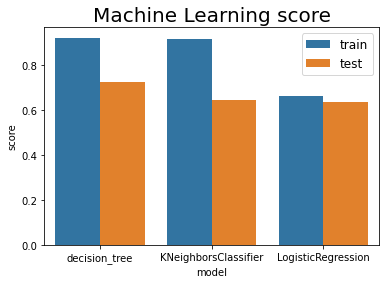

In [59]:
sns.barplot(x='model', y='score', hue='train/test', data=plot_df) # default : dodge=True

plt.title('Machine Learning score', fontsize=20)

plt.legend(fontsize=12)

plt.show()

# 최종 결론 - 테크온측에서 준 FRP, CFRP의 기준치를 머신러닝에 적용해 최종 수지를 결론

In [60]:
# GFRP (EFRP) 2.55,72,0,4.8,0,0,3400  2.55 3400
# GFRP (SFRP) 2.5, 87, 0, 5.7, 0, 0, 4480
# CFRP (고강도) 1.8, 300, 0, 2.1, 0, 0, 6500
# CFRP (고탄성) 1.98, 650, 0, 0.5, 0, 0, 3400

In [61]:
pre = pd.DataFrame()
pre['비중(Specific Gravity)'] = [2.55,2.5,1.8,1.98]
pre['인장강도'] = [72,87,300,650]
pre['파단강도'] = [0,0,0,0]
pre['신율\n(%)'] = [4.8,5.7,2.1,0.5]
pre['굴곡강도'] = [0,0,0,0]
pre['굴곡 탄성률'] = [0,0,0,0]
pre['인장탄성율(Mpa)'] = [3400,4480,6500,3400]

In [62]:
efrp_predict = tree.predict(pre)
efrp_predict

array(['PE', 'PE', 'PPS', 'PPS'], dtype=object)

In [63]:
a = ta[ta['수지종류'] == 'PE']
a[a["용도"] == '자동차']

,제품군,특징,용도,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
373,AE-2230,일반,자동차,PE,1.35,55.0,61.0,7.0,90.0,3900.0,4000.0


In [64]:
b = ta[ta['수지종류'] == 'PPS']
b[b["특징"] == 'GF/MF60% 보강, 표면 특성, 치수안전성']

,제품군,특징,용도,수지종류,비중(Specific Gravity),인장강도,파단강도,신율\n(%),굴곡강도,굴곡 탄성률,인장탄성율(Mpa)
270,LUSEP GP4600,"GF/MF60% 보강, 표면 특성, 치수안전성","자동차 부품, 전기전자 부품 등",PPS,1.91,155.0,NaN,1.1,228.0,17700.0,NaN


#  FRP -> PE : AE-2230
# CFRP -> PPS : LUSEP GP4600